# Predicting Loan Grants

## Business Understanding

Determine whether or not to grant the loan to the customer based on the likelihood of the loan being repaid

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('LoansTrainingSet.csv')
df.head()

C:\Users\Dennis\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


## Data Understanding

The dataset consists of the following fields:
* Loan ID: A unique Identifier for the loan information.

* Customer ID: A unique identifier for the customer. Customers may have more than one loan.

* Loan Status: A categorical variable indicating if the loan was paid back or defaulted.

* Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

* Term: A categorical variable indicating if it is a short term or long term loan.

* Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

* Years in current job: A categorical variable indicating how many years the customer has been in their current job.

* Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage

* Annual Income: The customer's annual income

* Purpose: A description of the purpose of the loan.

* Monthly Debt: The customer's monthly payment for their existing loans

* Years of Credit History: The years since the first entry in the customer’s credit history

* Months since last delinquent: Months since the last loan delinquent payment

* Number of Open Accounts: The total number of open credit cards

* Number of Credit Problems: The number of credit problems in the customer records.

* Current Credit Balance: The current total debt for the customer

* Maximum Open Credit: The maximum credit limit for all credit sources.

* Bankruptcies: The number of bankruptcies

* Tax Liens: The number of tax liens.

To make our prediction model, we will be using "Loan Status" as our dependent variable and the independent variables or the features will be used to train the model. 

## Data Preparation
Let's take a closer look at the data and see if there is any missing data to clean up or remove from the set of features.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

From the information above, it looks like we have data missing in "Credit Score", "Annual Income", "Months since last delinquent", "Bankruptcies", and "Tax Liens". The "Loan ID" and "Customer ID" columns will be dropped since they will provide no useful information for predicting whether or not a loan should be granted. The describe function will tell us whether or not there are any null inputs in the numerical columns. 

In [3]:
df.describe()

C:\Users\Dennis\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,NaN,NaN,13.500000,NaN,8.000000,0.000000,5.974000e+03,NaN,NaN
50%,1.429800e+04,NaN,NaN,17.000000,NaN,10.000000,0.000000,1.107800e+04,NaN,NaN
75%,2.436700e+04,NaN,NaN,21.700000,NaN,14.000000,0.000000,1.931900e+04,NaN,NaN
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


As we can see, the columns with NaN values contain null values, these are the columns to focus on cleaning first. Also, Credit Score is suppose to only contain values ranging from 0 to 800, but the max is 7510. This needs to be further investigated. 

In [4]:
columns_nan = df['Credit Score'].isnull()
df[columns_nan].head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,Fully Paid,4612,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$262.27,14.0,NaN,4,0,8919,9330,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,Short Term,NaN,n/a,Home Mortgage,NaN,Debt Consolidation,$206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
56,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,NaN,1 year,Own Home,NaN,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,NaN,n/a,Own Home,NaN,other,$425.68,21.3,NaN,7,1,4178,6850,1.0,0.0


From above, those who have NaN values in the Credit Score" column also have NaN values in "Annual Income". We will be dropping these rows since there is nothing that can be done with these. 

In [5]:
df = df[df['Credit Score'].notnull()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null float64
Years in current job            195308 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null object
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Op

Now both "Credit Score" and "Annual Income" columns have no missing values! Now we need to fix the range of "Credit Score" to be within 0 to 800.

In [7]:
df[['Credit Score']][(df['Credit Score'] > 800)].head()

,Credit Score
6,6640.0
55,7320.0
71,7180.0
73,6670.0
79,7270.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null float64
Years in current job            195308 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null object
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Op

It is safe to assume these credit score values were incorrectly inputted as they all end with a 0. Without the 0, the values of "Credit Score" fall within the appropriate range. We will remove the 0's on the right side from these values. Also Monthly Debt and Maximum Open Credit show as object, but they should be float64 since they are numeric values. 

In [9]:
# convert Credit Score column from float to int type
df['Credit Score'] = df['Credit Score'].astype(np.int64)

In [10]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x//10 if x > 800 else x)

In [11]:
df[['Credit Score']][(df['Credit Score'] > 800)].count() # counts number of credit scores over 800

Credit Score    0
dtype: int64

In [12]:
# convert Monthly Debt and Maximum Open Credit to float64 data type
df['Monthly Debt'] = df['Monthly Debt'].replace( '[\$, ]','', regex=True ).astype(float) # Removes the $ and converts to float
df['Monthly Debt'].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [13]:
# convert Maximum Open Credit to int64 data type
df['Maximum Open Credit'] = df['Maximum Open Credit'].convert_objects(convert_numeric=True)
df['Maximum Open Credit'].head()

C:\Users\Dennis\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


0    16056.0
1    19149.0
2    28335.0
3    43915.0
4    37081.0
Name: Maximum Open Credit, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195308 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         195308 non-null object
Customer ID                     195308 non-null object
Loan Status                     195308 non-null object
Current Loan Amount             195308 non-null int64
Term                            195308 non-null object
Credit Score                    195308 non-null int64
Years in current job            195308 non-null object
Home Ownership                  195308 non-null object
Annual Income                   195308 non-null float64
Purpose                         195308 non-null object
Monthly Debt                    195308 non-null float64
Years of Credit History         195308 non-null float64
Months since last delinquent    88466 non-null float64
Number of Open Accounts         195308 non-null int64
Number of Credit Problems       195308 non-null int64
Current Credit Balance          195308 non-null int64
Maximum Ope

Great! Credit Score values fall within the range we need and our columns are converted to their proper data types. Now to check our unique values in our categorical varibles. 

In [15]:
print "Loan Status", df['Loan Status'].unique()
print "Term: ", df['Term'].unique()
print "Years in current job: ", df['Years in current job'].unique()
print "Home Ownership: ", df['Home Ownership'].unique()
print "Purpose: ", df['Purpose'].unique()

Loan Status ['Fully Paid' 'Charged Off']
Term:  ['Short Term' 'Long Term']
Years in current job:  ['10+ years' '4 years' '6 years' 'n/a' '3 years' '2 years' '< 1 year'
 '5 years' '1 year' '7 years' '9 years' '8 years']
Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose:  ['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Medical Bills' 'Buy a Car' 'Take a Trip'
 'Educational Expenses']


Looks like "Home Ownership" and "Purpose" have extra categorical variables. "HaveMorgage" will be changed to "Home Morgage" in the "Home Ownership" column while "other" will be combined with "Other" column in the "Purpose" column.

In [16]:
# convert "HaveMortgage" to "Home Morgage"
df['Home Ownership'] = df['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [17]:
# convert "other to "Other"
df['Purpose'] = df['Purpose'].map(lambda x: 'Other' if x == 'other' else x)

In [18]:
# check the unique values
print "Home Ownership: ", df['Home Ownership'].unique()
print "Purpose: ", df['Purpose'].unique()

Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent']
Purpose:  ['Debt Consolidation' 'Other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Medical Bills' 'Buy a Car' 'Take a Trip'
 'Educational Expenses']


Let's determine what to do with the rest of the missing variables "Months since last delinquent", "Maximum Open Credit", "Bankruptcies", and "Tax Liens". Since "Months since last delinquent" has the most missing data, we will start with it.

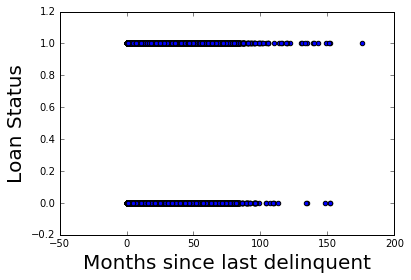

In [19]:
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

# Prepare data for plotting
df2 = df[df['Months since last delinquent'].notnull()] # makes new data frame without null values
x = df2['Months since last delinquent']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Months since last delinquent', fontsize=20)

By plotting the "Months since last delinquent" vs "Loan Status", we can see if there is any correlation between the months since last delinquent to the loan status being paid off or not. According to the plot, there is no distinguishable differences between the two variables, thus Months since last delinquent would not contribute much to our prediction model. Therefore, we will drop this column. 

In [20]:
df = df.drop(['Months since last delinquent'], axis = 1)

We will now be looking into our remaining null values in "Maximum Open Credit", "Bankruptcies", and "Tax Liens". 

In [21]:
columns_nan = df['Maximum Open Credit'].isnull()
print 'Number of missing "Maximum Open Credit entries": ', len(df[columns_nan])

Number of missing "Maximum Open Credit entries":  3


It is safe to say we can drop these three rows as it is not a significant amount to keep.

In [22]:
df = df[df['Maximum Open Credit'].notnull()] # drops rows in Maximum Open Credit with null values

In [23]:
columns_nan = df['Bankruptcies'].isnull()
df[columns_nan]['Loan Status'].value_counts()

Fully Paid     293
Charged Off    120
Name: Loan Status, dtype: int64

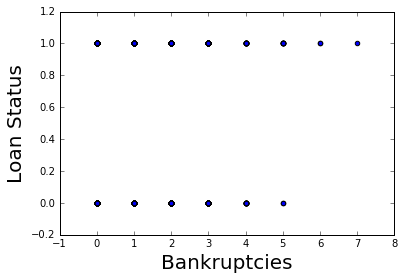

In [24]:
# Prepare data for plotting
df2 = df[df['Bankruptcies'].notnull()] # makes new data frame without null values
x = df2['Bankruptcies']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Bankruptcies', fontsize=20)

In [25]:
columns_nan = df['Tax Liens'].isnull()
df[columns_nan]['Loan Status'].value_counts()

Fully Paid     14
Charged Off     1
Name: Loan Status, dtype: int64

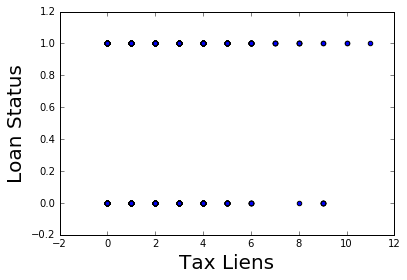

In [26]:
# Prepare data for plotting
df2 = df[df['Tax Liens'].notnull()] # makes new data frame without null values
x = df2['Tax Liens']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Tax Liens', fontsize=20)

Looking at both Bankruptcies and Tax Liens, there does not seem to be much data missing relative to the 195,000. Also, plotting them against loan status does not show any noticeable correlations. Therefore, we will be dropping the null rows for these variables as well. 

In [27]:
df = df[df['Bankruptcies'].notnull()] # drops rows in Maximum Open Credit with null values
df = df[df['Tax Liens'].notnull()] # drops rows in Maximum Open Credit with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194892 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      194892 non-null object
Customer ID                  194892 non-null object
Loan Status                  194892 non-null object
Current Loan Amount          194892 non-null int64
Term                         194892 non-null object
Credit Score                 194892 non-null int64
Years in current job         194892 non-null object
Home Ownership               194892 non-null object
Annual Income                194892 non-null float64
Purpose                      194892 non-null object
Monthly Debt                 194892 non-null float64
Years of Credit History      194892 non-null float64
Number of Open Accounts      194892 non-null int64
Number of Credit Problems    194892 non-null int64
Current Credit Balance       194892 non-null int64
Maximum Open Credit          194892 non-null float64
Bankruptcies                 194892 non-null float64
Tax L

Okay, it looks like our data is completely filled in. Let's check the Loan ID and Customer ID make sure there are no duplicate entries. 

In [28]:
print "Total unique Loan IDs: ", df['Loan ID'].nunique()
print "Total unique Customer IDs: ", df['Customer ID'].nunique()
print "Total entries: ", len(df)

Total unique Loan IDs:  170835
Total unique Customer IDs:  170835
Total entries:  194892


Out of 194,892 entries, only 170,835 of them are unique. This means there are multiple entries containing the same ID. Let's take a closer look.

In [29]:
df['Loan ID'].value_counts()

85dde351-7130-4c8e-8d34-a6bed6bb9aa8    4
894642e4-f97b-4fbf-ad0b-f5ecf3eae6aa    4
bb509d0d-ceed-4ffd-af4b-f516685a5bb0    4
abb66a15-c832-471c-9c86-91f40d8f9f30    4
75c5dae4-63aa-46e5-bdc7-00886d4d3198    4
03978b58-b9b6-4dea-a15b-b7bbf51f931d    4
deb3dbc6-c53b-48c3-b97a-8b8d12184728    4
6c1ae3f8-4c88-4436-b950-b5fa7965d240    4
121bb61b-4120-40e6-8342-b5019efce3b9    4
04ceb462-3563-4269-8660-ed5e7ee0f1e2    4
1d5cf9d9-f0ea-4676-bd3a-4e2f94fd68ab    4
f61effee-490b-46b4-abaf-8481f401db12    4
6e766ede-75e9-4b26-b781-e268faf258f0    4
5d4a0dae-d086-4332-a587-24b8671852db    4
363de87b-b8f5-435c-ad02-800ea9f5fa37    4
86b77e9a-16fc-4c38-bb88-a58445c14224    4
61258159-7492-4b04-b36e-b2b6abcf7f7d    4
ee54cde9-de2d-442f-b098-e43c82c3910f    4
ce2dc303-1f74-48ef-b6c1-7d471c010833    4
5e92f656-cdd8-4ab5-961f-ad30a1115871    4
7957fbf5-4a25-46fd-9f0f-3491084e62a4    4
280ff85d-e572-4f7f-91b2-68ce2eeb359a    4
10f1fae7-da0e-41b2-8224-16c592ad88c8    4
a2f45ad3-c591-4710-96a8-8ae9abb4a2

Looking at the value counts, there appears to be many duplicate values. These values can be dropped using the drop_duplicates function. 

In [30]:
df = df.drop_duplicates(['Loan ID']) # drops duplicate ID values

In [31]:
print "Total unique Loan IDs: ", df['Loan ID'].nunique()
print "Total unique Customer IDs: ", df['Customer ID'].nunique()
print "Total entries: ", len(df)

Total unique Loan IDs:  170835
Total unique Customer IDs:  170835
Total entries:  170835


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170835 entries, 0 to 256983
Data columns (total 18 columns):
Loan ID                      170835 non-null object
Customer ID                  170835 non-null object
Loan Status                  170835 non-null object
Current Loan Amount          170835 non-null int64
Term                         170835 non-null object
Credit Score                 170835 non-null int64
Years in current job         170835 non-null object
Home Ownership               170835 non-null object
Annual Income                170835 non-null float64
Purpose                      170835 non-null object
Monthly Debt                 170835 non-null float64
Years of Credit History      170835 non-null float64
Number of Open Accounts      170835 non-null int64
Number of Credit Problems    170835 non-null int64
Current Credit Balance       170835 non-null int64
Maximum Open Credit          170835 non-null float64
Bankruptcies                 170835 non-null float64
Tax L

Years in current job is an ordinal variable, which means that its categorical value can be treated as numeric since having greater years of experience in a current job would increase chance of loan grants due to career stability of the customer. n/a and \<1 will be converted to 0 since there is not much difference between the two.  

In [33]:
df['Years in current job'] = df['Years in current job'].map(lambda x: '0' if x == 'n/a' else x) # convert n/a and <1 to 0
df['Years in current job'] = df['Years in current job'].map(lambda x: '0' if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].replace( '[\+ years]','', regex=True).astype(np.int64) # removes the strings and convert to int

In [34]:
df['Years in current job'].unique()

array([10,  4,  6,  0,  3,  2,  5,  1,  7,  9,  8], dtype=int64)

Last thing to check is if "Current Loan Amount" is input correctly. To do this, lets filter out anyone taking a loan amount over $100,000 and see what we get. 

In [35]:
df[(df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742,3,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,11,0,8880,22711.0,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,5,1,11514,17262.0,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745,10,Rent,39476.0,Other,483.58,15.4,12,0,4636,21171.0,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724,1,Own Home,34297.0,Home Improvements,777.38,13.6,12,0,6720,53335.0,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750,10,Own Home,86785.0,Other,56.41,22.0,7,0,3959,63862.0,0.0,0.0


Interesting... this is obviously an input error seeing as the first 5 rows are taking a loan of \$99,999,999 with an annual income between \$30,000 to \$90,0000. These rows will be dropped. 

In [36]:
df = df[df['Current Loan Amount'] < 99999999]

In [37]:
df[(df['Current Loan Amount'] > 100000)].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


It looks like we can do some feature engineering here. Let's make a new feature called 'Credit Utilization', which will be made taking the divided by the 'Current Credit Balance' and 'Maximum Open Credit'.

In [38]:
df['Credit Utilization'] = df['Current Credit Balance'].div(df['Maximum Open Credit'] + 1, axis='index')

Now the data is all cleaned up. It's time to prepare our data for modeling! First the columns need to be renamed to make it simpler for making dummy variables and preventing problems with spaces in the column names. 

In [39]:
df['Loan Status'] = df['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0) # converts to binary output for easy modeling

In [40]:
df = df.rename(columns={'Loan Status': 'y', 'Current Loan Amount': 'x1', 'Term': 'x2', 'Credit Score': 'x3', 'Years in current job': 'x4', 'Home Ownership': 'x5', 'Annual Income': 'x6', 'Purpose': 'x7', 'Monthly Debt': 'x8', 'Years of Credit History': 'x9', 'Number of Open Accounts': 'x10', 'Number of Credit Problems': 'x11', 'Current Credit Balance': 'x12', 'Maximum Open Credit': 'x13', 'Bankruptcies': 'x14', 'Tax Liens': 'x15', 'Credit Utilization': 'x16'})
df.head()

,Loan ID,Customer ID,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0.0,0.0,0.421000
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734,4,Home Mortgage,42269.0,Other,1106.04,26.3,17,0,6262,19149.0,0.0,0.0,0.326997
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0.0,0.0,0.739942
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0.0,0.0,0.513002
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746,4,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0.0,0.0,0.468988


Here is a list of the columns and what they mean:

|Column Name | Variable Name| Data Type|
|---|---|---|
|Loan Status|y| categorical|
|Current Loan Amount| x1| numeric|
|Term| x2| categorical|
|Credit Score| x3| numeric|
|Years in current job| x4| ordinal|
|Home Ownership| x5| categorical|
|Annual Income| x6| numeric|
|Purpose| x7| categorical|
|Monthly Debt| x8| numeric|
|Years of Credit History| x9| numeric|
|Number of Open Accounts| x10| numeric|
|Number of Credit Problems| x11| numeric|
|Current Credit Balance| x12| numeric|
|Maximum Open Credit| x13| numeric|
|Bankruptcies| x14| numeric|
|Tax Liens| x15| numeric|
|Credit Utilization| x16| numeric|

In [41]:
from patsy import dmatrices
# Create the dummy variables for categorical values using dmatrices
y, X = dmatrices('y ~ x1 + C(x2) + x3 + x4 + C(x5) + x6 + C(x7) + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16', df, return_type = 'dataframe')
X.head()

,Intercept,C(x2)[T.Short Term],C(x5)[T.Own Home],C(x5)[T.Rent],C(x7)[T.Buy House],C(x7)[T.Buy a Car],C(x7)[T.Debt Consolidation],C(x7)[T.Educational Expenses],C(x7)[T.Home Improvements],C(x7)[T.Medical Bills],...,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,33694.0,584.03,12.3,10.0,0.0,6760.0,16056.0,0.0,0.0,0.421000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42269.0,1106.04,26.3,17.0,0.0,6262.0,19149.0,0.0,0.0,0.326997
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,90126.0,1321.85,28.8,5.0,0.0,20967.0,28335.0,0.0,0.0,0.739942
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,38072.0,751.92,26.2,9.0,0.0,22529.0,43915.0,0.0,0.0,0.513002
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,50025.0,355.18,11.5,12.0,0.0,17391.0,37081.0,0.0,0.0,0.468988


In [42]:
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## Modeling
Since this problem results in a binary output, we will select algorithms that are good at classification: Logistic Regression, Adaboost and Gradient Boosting. 

In [43]:
# Split the data into 70% Training Data and 30% Testing Data with seed(0)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [44]:
# import our algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [45]:
# sklearn Logistic Regression
reg = LogisticRegression(fit_intercept = False, C = 1e9)
logmodel = reg.fit(X_train, y_train)

# Make predictions and determine accuracy score
y_predlog = logmodel.predict(X_test)

acclog = accuracy_score(y_predlog, y_test)

print acclog

C:\Users\Dennis\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.725932840404


In [46]:
# Gradient Boosting
params = {'n_estimators': 600, 'max_depth': 1,
          'learning_rate': 0.1, 'min_samples_leaf': 1, 'random_state': 42}
gbc = GradientBoostingClassifier(**params)
gbcmodel = gbc.fit(X_train, y_train)

y_predgbc = gbcmodel.predict(X_test)

accgbc = accuracy_score(y_predgbc, y_test)

print accgbc

C:\Users\Dennis\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.736274533887


In [47]:
# Random Forest
rf = RandomForestClassifier(n_estimators= 25, max_depth= None, max_features = 0.4, random_state = 42)
rfmodel = rf.fit(X_train, y_train)

y_predrf = rfmodel.predict(X_test)

accrf = accuracy_score(y_predrf, y_test)

print accrf

C:\Users\Dennis\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.725073079663
